In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# Load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

In [31]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
"""
One popular dataset is the "Air Passengers" dataset,
which represents the monthly total number of international airline passengers from 1949 to 1960.
"""

'\nOne popular dataset is the "Air Passengers" dataset, \nwhich represents the monthly total number of international airline passengers from 1949 to 1960.\n'

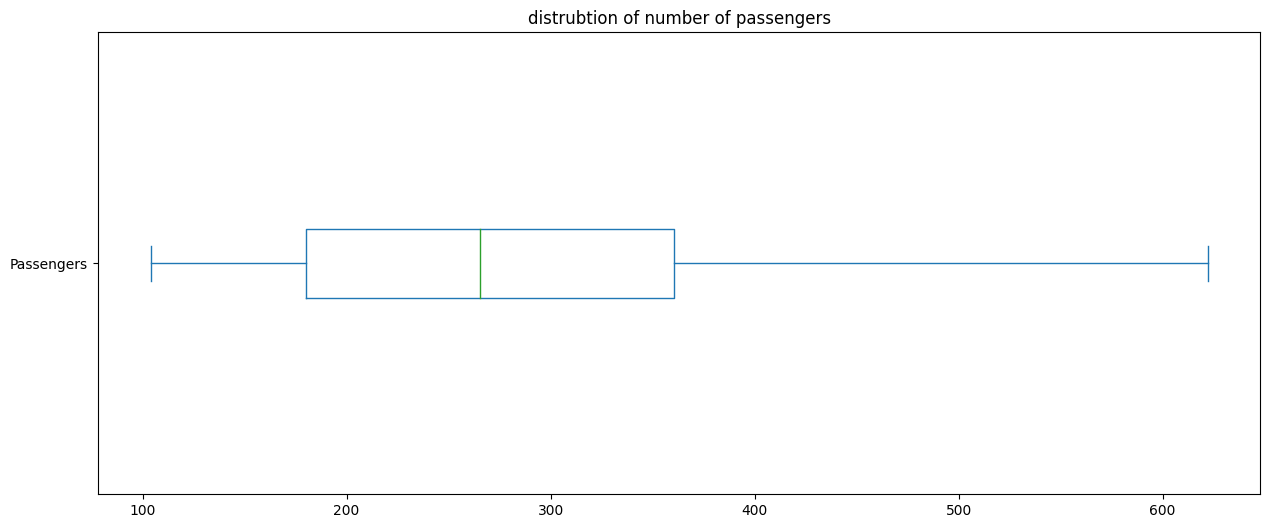

In [33]:
# lets see outliers in our dataset
fig,ax=plt.subplots(figsize=(15,6))
df['Passengers'].plot(kind="box",vert=False,title="distrubtion of number of passengers",ax=ax);

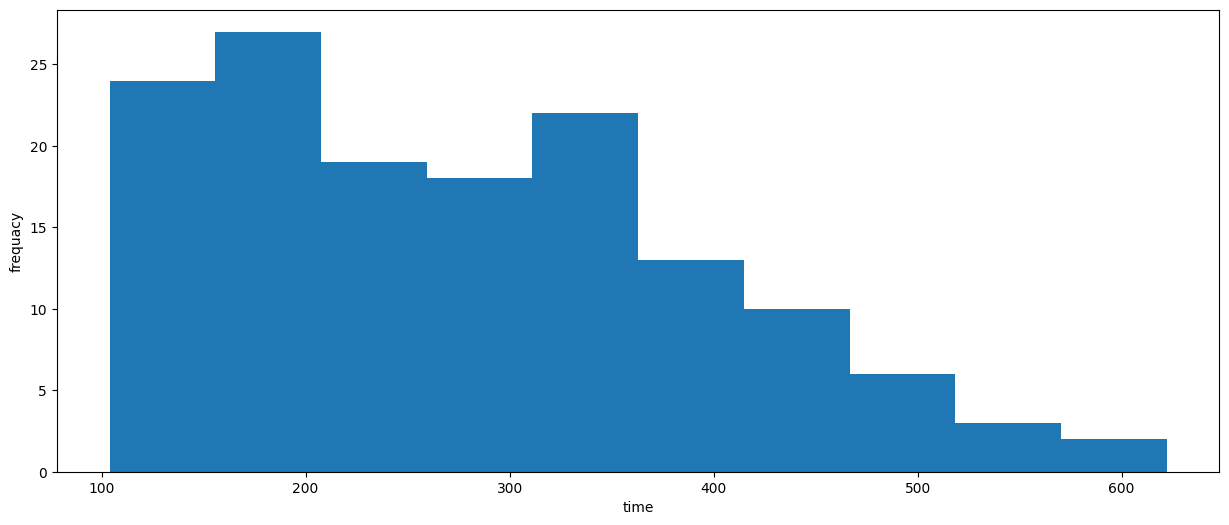

In [34]:
fig,ax=plt.subplots(figsize=(15,6))
plt.hist(df['Passengers'])
plt.xlabel("time")
plt.ylabel("frequacy");

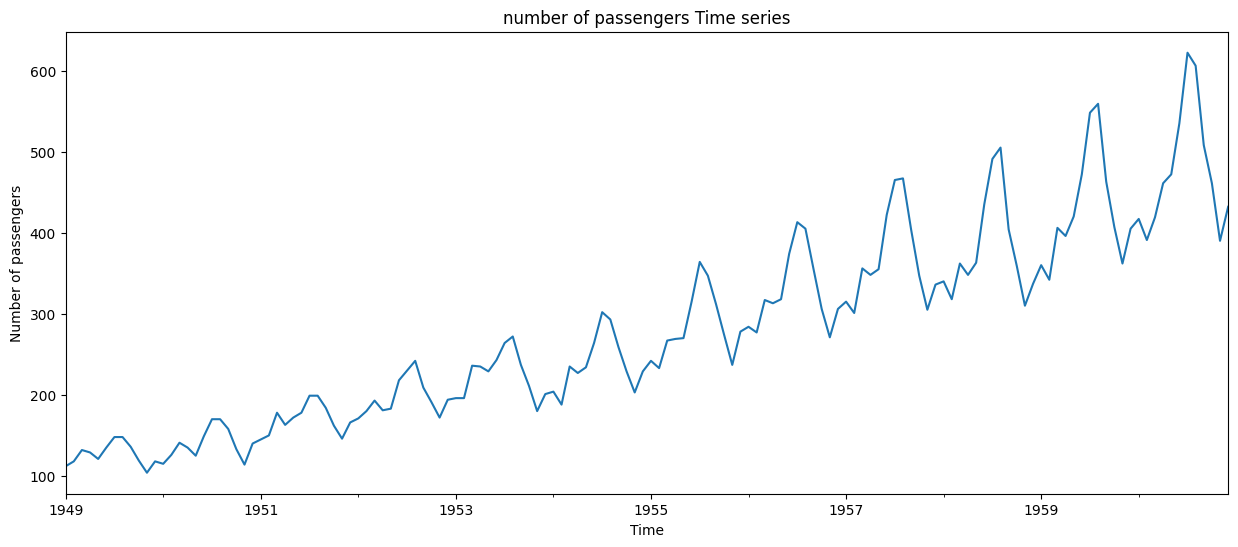

In [35]:
# as we see there is no outliers in our data
# lets do time series plot
fig,ax=plt.subplots(figsize=(15,6))
df['Passengers'].plot(ax=ax,xlabel="Time",ylabel="Number of passengers",title="number of passengers Time series");


In [36]:
# as first look our data has alot of ups and downs and seem like increasing over time and theres no missing data
# now we have to ask ourself in which time intrval we want to make our predictions
# as our is collected every month lets see sum of passengers each month
df['Passengers'].resample("M").sum().head()
# lets see if there is missing data
df['Passengers'].resample("M").sum().isnull().sum()

0

In [37]:
new_df=df['Passengers'].resample("M").sum().to_frame()

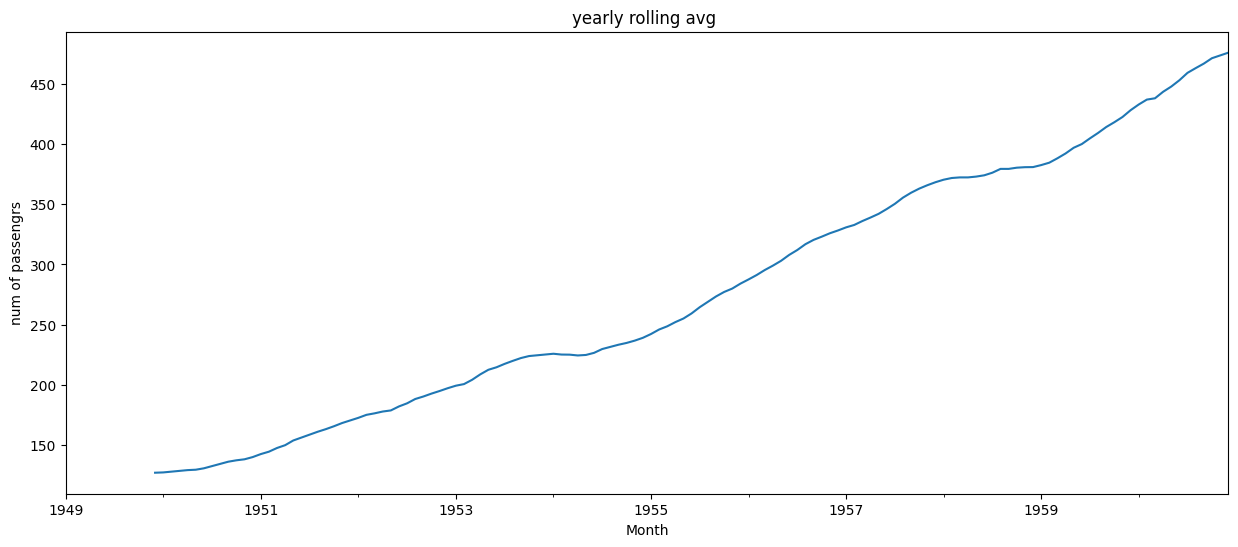

In [38]:
# now lets see trend in our data with rolling avg method
# 12 as year=12 month
df['Passengers'].rolling(12).mean()
# as we see we find nan values and they are 11 which mean they are less than window so lets plot
fig,ax=plt.subplots(figsize=(15,6))
df['Passengers'].rolling(12).mean().plot(ax=ax,ylabel="num of passengrs",title="yearly rolling avg ");


In [39]:
# as we see there is increase
# always rember we need feature and target to train our model and now we will get our feature from our target
# there is 2 ways one is dummy time from index and other is lag column
# here i will try lag
new_df['Passengers'].shift(1).head()

Month
1949-01-31      NaN
1949-02-28    112.0
1949-03-31    118.0
1949-04-30    132.0
1949-05-31    129.0
Freq: M, Name: Passengers, dtype: float64

In [40]:
new_df['Passengers.lag_one']=new_df['Passengers'].shift(1)

In [41]:
#we will drop nan values
new_df.dropna(inplace=True)

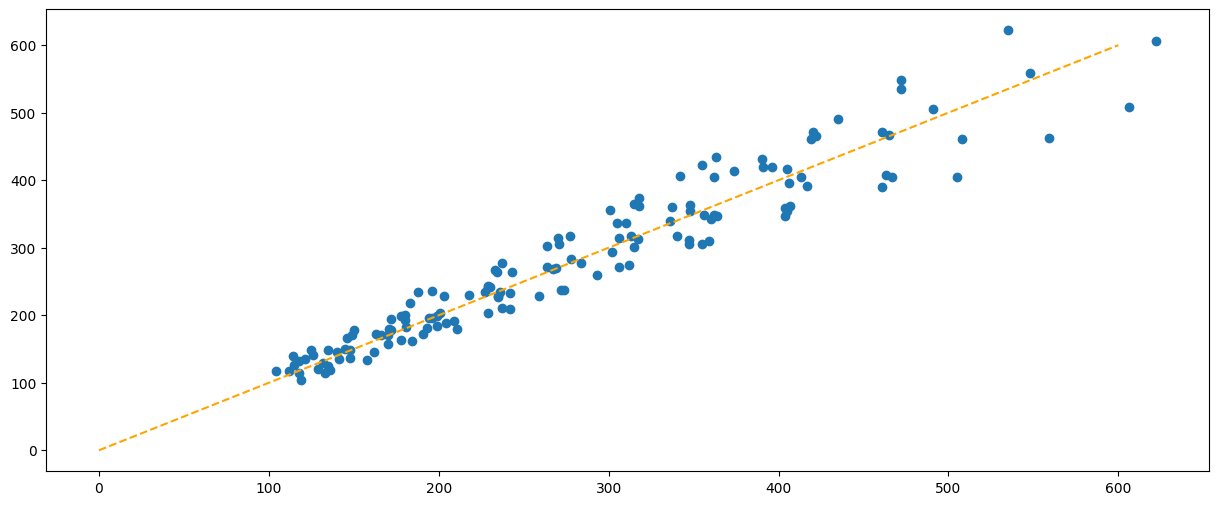

In [43]:
# now lets see corr between time and lag time by one which is also called autocorrlartion
fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(x=new_df['Passengers.lag_one'],y=new_df['Passengers'])
ax.plot([0,600],[0,600],linestyle="--",color="orange");

In [47]:
# as we see there is corr between time and time lag by one
# now lets split our data to train it  80 % for train and 20 % for test and make sure test in future time
X=new_df.drop(columns=['Passengers'])
y=new_df['Passengers']
cutoff=int(len(X)*0.8)
X_train,y_train=X.iloc[:cutoff],y.iloc[:cutoff]
X_test,y_test=X.iloc[cutoff:],y.iloc[cutoff:]
# to check if we moving right
assert len(X_train)+len(X_test)==len(X)


In [49]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [52]:
# lets plot timeseries prediction to see our model
df_pred_test=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
df_pred_test.set_index(y_test)
fig=px.line(df_pred_test,labels={"value":"number of passengrs"})
fig.show()

In [ ]:
# i see  its doing good not bad